In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

## Q1) Train a k-NN model on the training set

In [6]:
test_data = pd.read_csv('ann-test.data', sep=' ', header=None)
train_data = pd.read_csv('ann-train.data', sep=' ', header=None)

test_data = test_data.drop([22, 23], axis = 1)
train_data = train_data.drop([22, 23], axis = 1)
test_data.iloc[:, -1].replace({2: 0, 1:0}, inplace=True)
train_data.iloc[:, -1].replace({2: 0, 1:0}, inplace=True)
test_data.iloc[:, -1].replace({3: 1}, inplace=True)
train_data.iloc[:, -1].replace({3: 1}, inplace=True)

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.028,0.111,0.131,0.085,0
1,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0013,0.019,0.084,0.078,0.107,1
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.031,0.239,0.100,0.239,1
3,0.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0010,0.018,0.087,0.088,0.099,1
4,0.22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.0004,0.022,0.134,0.135,0.099,1


[[  65  185]
 [  28 3150]]


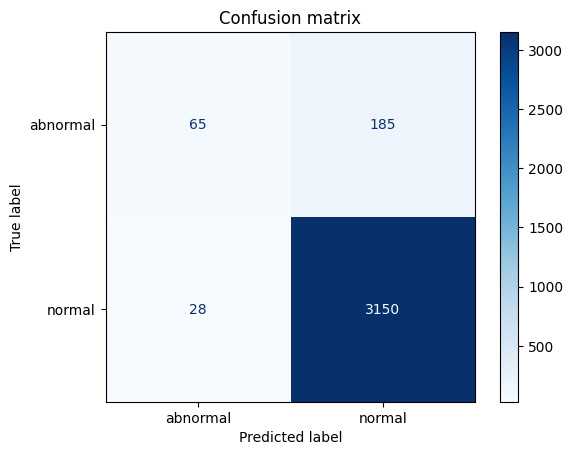

In [7]:
k = 3
X_test = test_data.iloc[:, : -1]
y_test = test_data.iloc[:, -1]
X_train = train_data.iloc[:, : -1]
y_train = train_data.iloc[:, -1]

clf = KNeighborsClassifier(k).fit(X_train, y_train)

y_predict = clf.predict(X_test)

#Build the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=['abnormal', 'normal']
    )
disp.ax_.set_title("Confusion matrix")

# tn, fp], fn, tp = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test, y_predict))


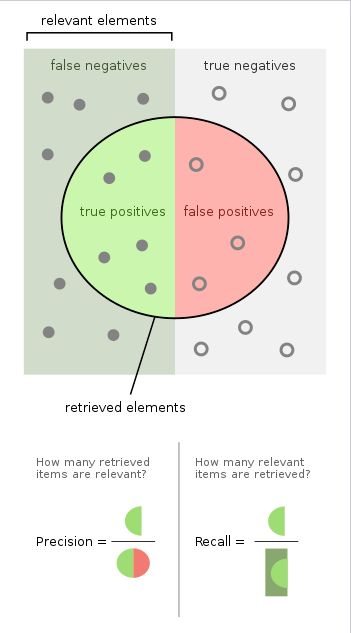

Out of all the perceived 'true' values, how many of them are accurate?
Precision = TP / (TP + FP)

Out of all the tested true values, what percentage of them were perceived to be true?
Recall = TP / (TP + FN)

F1 = harmon mean of precision and recall


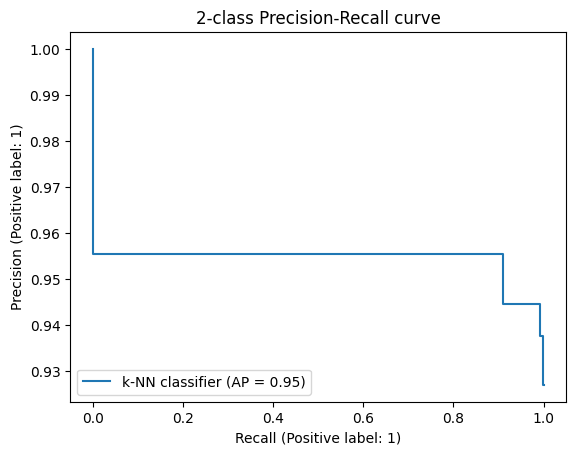

In [8]:
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="k-NN classifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

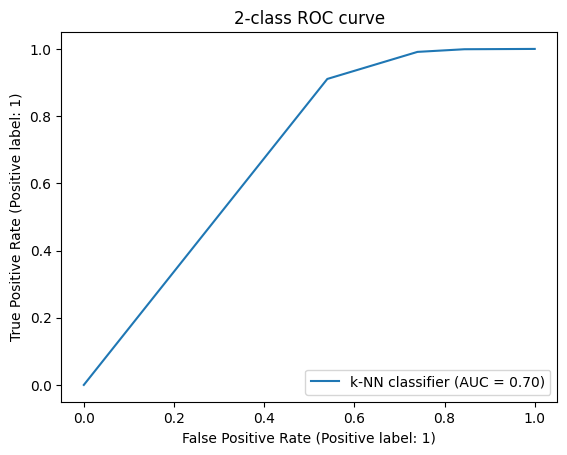

In [9]:
display = RocCurveDisplay.from_estimator(
    clf, X_test, y_test, name="k-NN classifier"
)
_ = display.ax_.set_title("2-class ROC curve")                               

## Q2) Attempt to reproduce Example 4.5 from the textbook

- Convert the data into a binary classification problem. 
- Train a logistic regression model on the training data.
- Evaluate the trained model to calculate a confusion matrix.
- Vary  the  decision  threshold  for  the  model  as  done  in  Example  4.5  and  recalculate the confusion matrix

[<Axes: > <Axes: >]


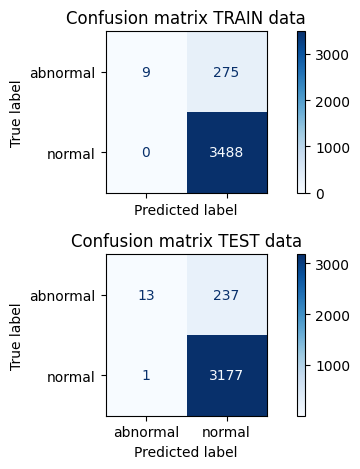

In [10]:
#The first step is already completed, we have converted the data into a binary classification problem

#train a logistic regression model
log_reg = LogisticRegression().fit(X_train, y_train)

#evaluate the trained model to calculate a confusion matrix
#let's plot both the test and train confusion matrix
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
print(axs)
#first, the train confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        log_reg,
        X_train,
        y_train,
        ax=axs[0],
        cmap=plt.cm.Blues,
        display_labels=['abnormal', 'normal']
    )
disp.ax_.set_title("Confusion matrix TRAIN data")

#first, the test confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        log_reg,
        X_test,
        y_test,
        ax=axs[1],
        cmap=plt.cm.Blues,
        display_labels=['abnormal', 'normal']
    )
disp.ax_.set_title("Confusion matrix TEST data")
fig.tight_layout()
plt.show()

In [13]:
pred_proba_df = pd.DataFrame(log_reg.predict_proba(X_test))
threshold_list = [0.05,0.2,0.25,0.3,0.5,.75,.95,.99]
print("Remember: A positive refers to an normal test (and thus TP is a normal test that is sucessfully identified) A FN refers to an abnormal test, incorrectly identifed as normal")

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test,
                                           y_test_pred.iloc[:,1])
    print('Our testing accuracy is {}'.format(test_accuracy))
    F, P = confusion_matrix(y_test, y_test_pred.iloc[:,1])
    print(f"Confusion matrix: \n TN: {F[0]} FN: {F[1]} \n FP: {P[0]} TP: {P[1]}")

Remember: A positive refers to an normal test (and thus TP is a normal test that is sucessfully identified) A FN refers to an abnormal test, incorrectly identifed as normal

******** For i = 0.05 ******
Our testing accuracy is 0.927071178529755
Confusion matrix: 
 TN: 0 FN: 250 
 FP: 0 TP: 3178

******** For i = 0.2 ******
Our testing accuracy is 0.9282380396732789
Confusion matrix: 
 TN: 4 FN: 246 
 FP: 0 TP: 3178

******** For i = 0.25 ******
Our testing accuracy is 0.9285297549591599
Confusion matrix: 
 TN: 5 FN: 245 
 FP: 0 TP: 3178

******** For i = 0.3 ******
Our testing accuracy is 0.9285297549591599
Confusion matrix: 
 TN: 5 FN: 245 
 FP: 0 TP: 3178

******** For i = 0.5 ******
Our testing accuracy is 0.9305717619603268
Confusion matrix: 
 TN: 13 FN: 237 
 FP: 1 TP: 3177

******** For i = 0.75 ******
Our testing accuracy is 0.9372812135355892
Confusion matrix: 
 TN: 46 FN: 204 
 FP: 11 TP: 3167

******** For i = 0.95 ******
Our testing accuracy is 0.40927654609101516
Confusion 

## The pokemon dataset with the introduction of L1 and L2 regularisation

In [4]:
pokemon = pd.read_csv('pokemonregr.csv')
pokemon = pokemon.dropna()
regr = LinearRegression().fit(pokemon.loc[:,'attack':'speed'], pokemon['weight_kg'])

X_scaled = preprocessing.StandardScaler().fit(pokemon.loc[:,'attack':'speed']).transform(pokemon.loc[:,'attack':'speed'])
regr = LinearRegression().fit(X_scaled, pokemon['weight_kg'])
x = list(zip(pokemon.loc[:, 'attack':'speed'].columns, [round(i, 3) for i in regr.coef_]))
# print("#################### Without regularisation ######################")
# print(x)

##Create a new dataframe to keep track of all the co-efficients using L1 and L2 regularisation
df_regularisation = pd.DataFrame( data= [[0 ] * 8] * 9, columns=(['Regularisation', 'coefficient'] + list( pokemon.loc[:, 'attack':'speed'])))
idx_filled = 1
df_regularisation.loc[0, :] =  "None", "0", *[round(i, 3) for i in regr.coef_]

# print(df_regularisation.head())

# perform L1 and L2 regularisation
#L1 regularisation (LASSO)
regularisation_params = [0.1, 0.4, 0.6, 0.8, 1, 2, 5, 8, 20, 50, 1000, 100000]
for i in regularisation_params:
    regr_L1 = Lasso(alpha=i).fit(X_scaled, pokemon['weight_kg'])

    df_regularisation.loc[idx_filled, :] =  "L1", i, *[round(i, 3) for i in regr_L1.coef_]
    idx_filled += 1



#L2 regularisation (LASSO)
for i in regularisation_params:
    regr_L2 = Ridge(alpha=i).fit(X_scaled, pokemon['weight_kg'])

    df_regularisation.loc[idx_filled, :] =  "L2", i, *[round(i, 3) for i in regr_L2.coef_]
    idx_filled += 1

df_regularisation.style

,Regularisation,coefficient,attack,defense,height_m,sp_attack,sp_defense,speed
0,None,0,12.153000,17.478000,57.776000,0.791000,4.295000,-12.176000
1,L1,0.100000,12.036000,17.506000,57.732000,0.678000,4.234000,-11.961000
2,L1,0.400000,11.692000,17.587000,57.599000,0.337000,4.053000,-11.318000
3,L1,0.600000,11.464000,17.639000,57.510000,0.108000,3.933000,-10.889000
4,L1,0.800000,11.218000,17.702000,57.405000,0.000000,3.763000,-10.494000
5,L1,1,10.957000,17.775000,57.285000,0.000000,3.550000,-10.128000
6,L1,2,9.649000,18.141000,56.687000,0.000000,2.481000,-8.299000
7,L1,5,5.833000,18.840000,54.788000,0.000000,0.000000,-2.982000
8,L1,8,3.109000,17.807000,52.712000,0.000000,0.000000,-0.000000
9,L1,20,0.000000,10.127000,44.807000,0.000000,0.000000,-0.000000


Why is this the case?

For L1 regularisation:

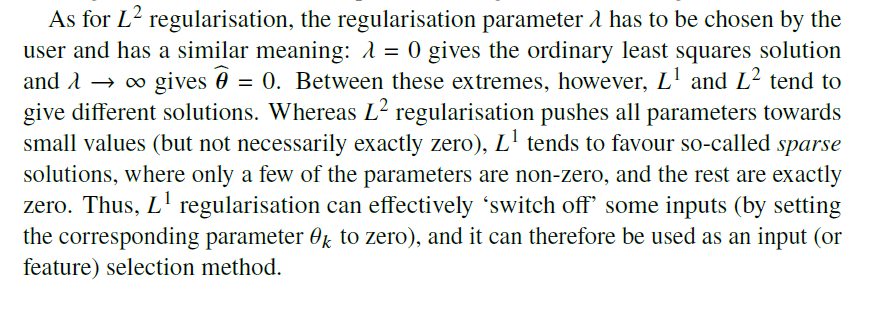

For L2 regularisation:

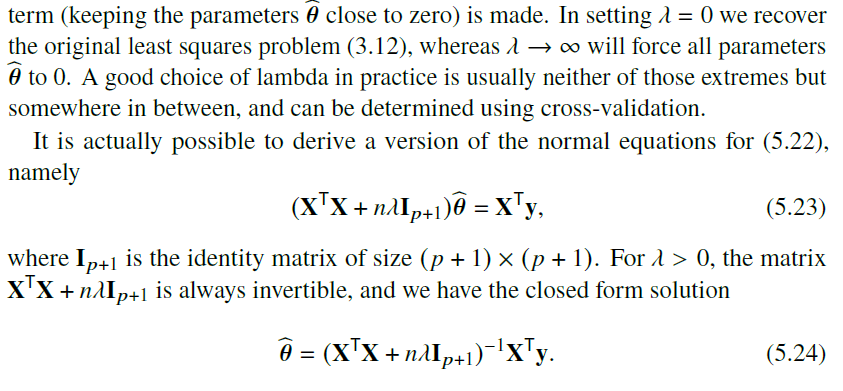